In [50]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
from patsy import dmatrices
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import logistic_regression_path
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

%matplotlib inline

df = pd.read_csv("Sessionized_SquarePanda.csv",parse_dates=True,error_bad_lines=False)
df.head()



,childid,session_id,createdat,gamename,duration,gender,age,wordtype,platform,gamescore,minutes_since_last_interval,new_event_boundary
0,1004,0,2016-11-07 20:34:00,Lagoon,47,F,19,WORD,Not Known,1,NaN,0
1,1005,0,2016-11-07 20:52:00,Lagoon,7,F,7,WORD,Not Known,1,NaN,0
2,1005,0,2016-11-07 20:53:00,Lagoon,0,F,7,WORD,Not Known,1,1.0,0
3,1005,0,2016-11-07 20:54:00,Lagoon,0,F,7,WORD,Not Known,1,1.0,0
4,1010,0,2016-11-08 00:45:00,Bubbles,70,F,4,WORD,Not Known,1,NaN,0


In [51]:
df['dayofweek'] = pd.to_datetime(df['createdat']).dt.dayofweek
#df_1 = df.groupby('childid')
#df_1.describe()

In [52]:
df_sub = pd.DataFrame(df, index = [0,1,2,3,4,5,6,7,8,9,10])

In [53]:
#df_1.dayofweek.hist()
df_sub

,childid,session_id,createdat,gamename,duration,gender,age,wordtype,platform,gamescore,minutes_since_last_interval,new_event_boundary,dayofweek
0,1004,0,2016-11-07 20:34:00,Lagoon,47,F,19,WORD,Not Known,1,NaN,0,0
1,1005,0,2016-11-07 20:52:00,Lagoon,7,F,7,WORD,Not Known,1,NaN,0,0
2,1005,0,2016-11-07 20:53:00,Lagoon,0,F,7,WORD,Not Known,1,1.0,0,0
3,1005,0,2016-11-07 20:54:00,Lagoon,0,F,7,WORD,Not Known,1,1.0,0,0
4,1010,0,2016-11-08 00:45:00,Bubbles,70,F,4,WORD,Not Known,1,NaN,0,1
5,1010,1,2016-11-10 00:07:00,Bubbles,23,F,4,WORD,Not Known,0,2842.0,1,3
6,1010,2,2016-11-12 12:40:00,Bubbles,78,F,4,WORD,Not Known,1,3633.0,1,5
7,1010,2,2016-11-12 12:52:00,Bubbles,294,F,4,WORD,Not Known,1,12.0,0,5
8,1010,3,2016-11-17 00:14:00,Bowling,48,F,4,WORD,Not Known,1,6442.0,1,3
9,1010,3,2016-11-17 00:15:00,Bowling,55,F,4,WORD,Not Known,1,1.0,0,3


In [83]:
y, X = dmatrices('childid ~ dayofweek',df_sub, return_type="dataframe")
print X.columns
#model = sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

df['childid'] = pd.to_numeric(df['childid'])

model = sklearn.linear_model.LogisticRegression(fit_intercept=True)

Index([u'Intercept', u'dayofweek'], dtype='object')


In [84]:
model.fit(X,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
model.score(X,y)

0.90909090909090906

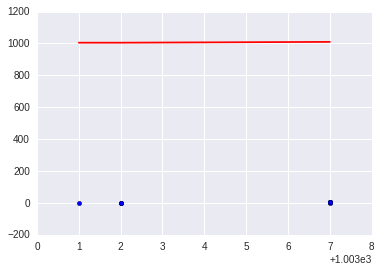

In [86]:
plt.scatter(df_sub["childid"], df_sub["dayofweek"])
plt.plot(df_sub["childid"], model.predict(X), color="r")
plt.show()

In [91]:
np.savetxt('test.csv',X, delimiter=',')
np.genfromtxt('test.csv', delimiter=',')

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  3.],
       [ 1.,  5.],
       [ 1.,  5.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.]])